In [11]:
import pandas as pd
unaccepted_hour_input_path = "{}/{}".format(unaccepted_base_path,'1_timingDistributionOfBigHints/part-00000-cc3a6cbd-8cba-477b-a61a-1dbb0099dabe-c000.csv')
unaccepted_hour_df = pd.read_csv(unaccepted_hour_input_path)
unaccepted_hour_df.columns
unaccepted_hour_df.head()


,_id,hour,week_day
0,05O55G5455QNL4JTP4J055PQ,21,Wed
1,05O55G5455QNO4OTP4T055PQ,5,Sun
2,05O55G5455QOG40TP4T055P5,6,Tue
3,05O55G5455QOL4QTP44055P4,5,Sat
4,05O55G5455QOQ4LTP45055PG,4,Mon


In [12]:
import pandas as pd
accepted_base_path = "/Users/bhavani.sankar/Desktop/Proj/Asurion/Tasks/Homma/11_ai_eventLog_analysis_tasks/AcceptedCases"
accpeted_hour_path= "{}/{}".format(accepted_base_path,'1_timingDistributionOfBigHints/part-00000-ffbb169b-465f-4fdb-bca1-1e24a97af394-c000.csv')
accepted_hour_df = pd.read_csv(accpeted_hour_path)
accepted_hour_df.head()


,_id,hour,week_day
0,040Q0TG55GOTT5JTP4GO5TPT,5,Tue
1,05G4JQGO50TGTT4TP4O4TTPG,22,Tue
2,05G4JQGO50TGTT4TP4O4TTPG,1,Mon
3,05NOG0J454G444LTP44N5TPJ,22,Sat
4,05O5505455Q0O4NTP4Q055P4,23,Sun


In [13]:
#type(hour_df.index)
unaccepted_hour_df.dtypes

_id         object
hour         int64
week_day    object
dtype: object

In [14]:
accepted_hour_df.dtypes

_id         object
hour         int64
week_day    object
dtype: object

In [ ]:
#hour_df.info()
#hour_df.shape
#hour_df.index
#hour_df.columns
#hour_df.count()

In [ ]:
#hour_df.sum()
#hour_df.cumsum()
#hour_df.min()
#hour_df.max()

In [15]:
unaccepted_weekday_df =unaccepted_hour_df.loc[~unaccepted_hour_df['week_day'].isin(['Sat','Sun'])]
#reset_index(inplace=True)
unaccepted_weekday_df = unaccepted_weekday_df[['_id','hour']]
unaccepted_weekday_hour_count_df = unaccepted_weekday_df.groupby('hour').size().reset_index(name='count')
unaccepted_weekday_hour_count_df.head()


,hour,count
0,0,188404
1,1,197948
2,2,218985
3,3,236373
4,4,223769


In [16]:
accpeted_weekday_df =accepted_hour_df.loc[~accepted_hour_df['week_day'].isin(['Sat','Sun'])]
#reset_index(inplace=True)
accpeted_weekday_df = accpeted_weekday_df[['_id','hour']]
accepted_weekday_hour_count_df = accpeted_weekday_df.groupby('hour').size().reset_index(name='count')
accepted_weekday_hour_count_df.head()

,hour,count
0,0,227
1,1,235
2,2,262
3,3,342
4,4,262


In [17]:
unaccepted_weekday_hour_count_df['count'].sum()

3541822

In [25]:
unaccepted_weekday_hour_count_df['perc']= round(unaccepted_weekday_hour_count_df['count']/unaccepted_weekday_hour_count_df['count'].sum() * 100,4)
unaccepted_weekday_hour_count_df.head(10)
#unaccepted_weekday_hour_count_df['perc'].sum()


,hour,count,perc
0,0,188404,5.3194
1,1,197948,5.5889
2,2,218985,6.1828
3,3,236373,6.6738
4,4,223769,6.3179
5,5,246210,6.9515
6,6,249172,7.0351
7,7,223885,6.3212
8,8,171631,4.8458
9,9,109108,3.0806


In [18]:
accepted_weekday_hour_count_df['count'].sum()

4363

In [26]:
accepted_weekday_hour_count_df['perc']= round(accepted_weekday_hour_count_df['count']/accepted_weekday_hour_count_df['count'].sum() * 100,4)
accepted_weekday_hour_count_df.head(10)
#accepted_weekday_hour_count_df['perc'].sum()


,hour,count,perc
0,0,227,5.2028
1,1,235,5.3862
2,2,262,6.0050
3,3,342,7.8386
4,4,262,6.0050
5,5,312,7.1510
6,6,314,7.1969
7,7,303,6.9448
8,8,214,4.9049
9,9,126,2.8879


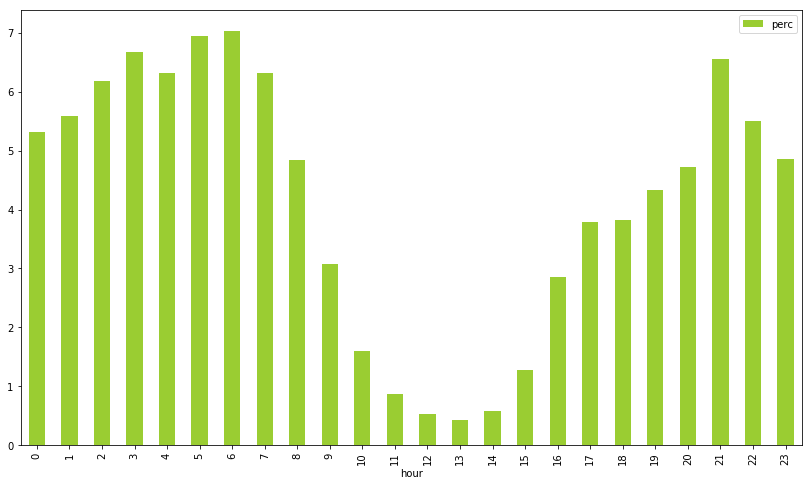

In [30]:
from matplotlib import pyplot as plt
ax = plt.gca()
unaccepted_weekday_hour_count_df.plot(kind='bar',x='hour',y='perc',color='yellowgreen',ax=ax)
plt.rcParams["figure.figsize"] = (13,8)
plt.show()


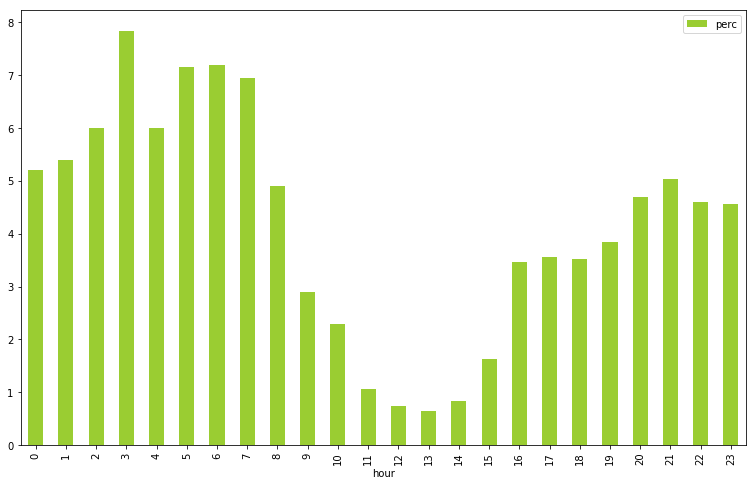

In [31]:
from matplotlib import pyplot as plt
ax = plt.gca()
accepted_weekday_hour_count_df.plot(kind='bar',x='hour',y='perc',color='yellowgreen',ax=ax)
plt.rcParams["figure.figsize"] = (15,8)
plt.show()


In [32]:
unaccepted_weekend_df = unaccepted_hour_df.loc[unaccepted_hour_df['week_day'].isin(['Sat','Sun'])]
unaccepted_weekend_df = unaccepted_weekend_df[['_id','hour']]
unaccepted_weekend_hour_count_df = unaccepted_weekend_df.groupby('hour').size().reset_index(name='count')
unaccepted_weekend_hour_count_df.head()


,hour,count
0,0,90881
1,1,95209
2,2,105739
3,3,111711
4,4,101675


In [33]:
accepted_weekend_df = accepted_hour_df.loc[accepted_hour_df['week_day'].isin(['Sat','Sun'])]
accepted_weekend_df = accepted_weekend_df[['_id','hour']]
accepted_weekend_hour_count_df = accepted_weekend_df.groupby('hour').size().reset_index(name='count')
accepted_weekend_hour_count_df.head()


,hour,count
0,0,88
1,1,105
2,2,119
3,3,119
4,4,128


In [36]:
unaccepted_weekend_hour_count_df['count'].sum()

1693785

In [37]:
unaccepted_weekend_hour_count_df['perc']= round(unaccepted_weekend_hour_count_df['count']/unaccepted_weekend_hour_count_df['count'].sum() * 100,4)
unaccepted_weekend_hour_count_df.head()


,hour,count,perc
0,0,90881,5.3656
1,1,95209,5.6211
2,2,105739,6.2428
3,3,111711,6.5953
4,4,101675,6.0028


In [38]:
accepted_weekend_hour_count_df['count'].sum()

2095

In [39]:
accepted_weekend_hour_count_df['perc']= round(accepted_weekend_hour_count_df['count']/accepted_weekend_hour_count_df['count'].sum() * 100,4)
accepted_weekend_hour_count_df.head()


,hour,count,perc
0,0,88,4.2005
1,1,105,5.0119
2,2,119,5.6802
3,3,119,5.6802
4,4,128,6.1098


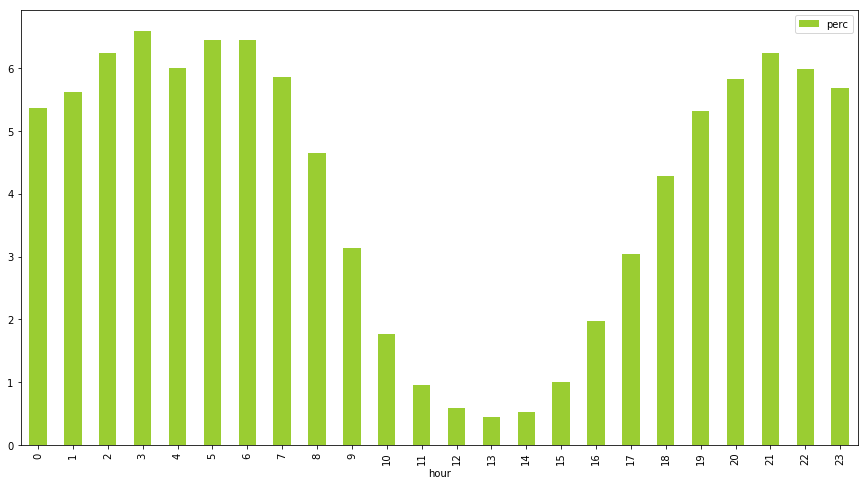

In [40]:
ax = plt.gca()
unaccepted_weekend_hour_count_df.plot(kind='bar',x='hour',y='perc',color='yellowgreen',ax=ax)
plt.rcParams["figure.figsize"] = (15,8)
plt.show()

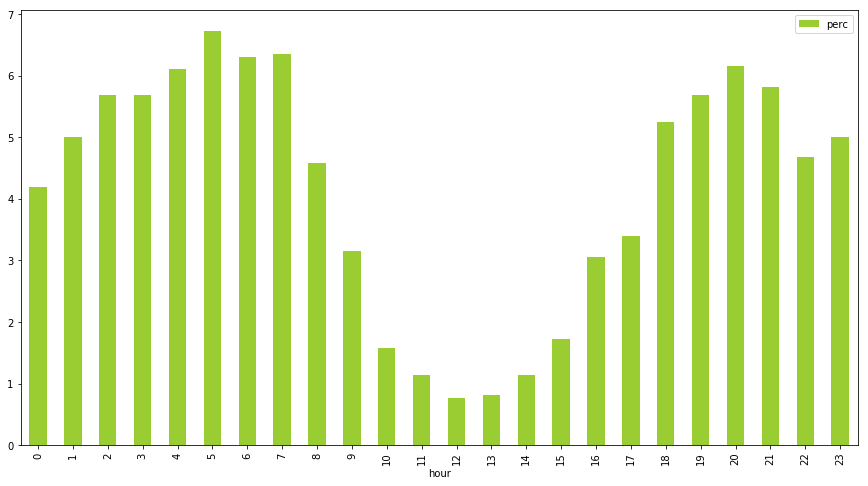

In [41]:
ax = plt.gca()
accepted_weekend_hour_count_df.plot(kind='bar',x='hour',y='perc',color='yellowgreen',ax=ax)
plt.rcParams["figure.figsize"] = (15,8)
plt.show()

In [44]:
#hour_df.plot.bar(x='hour', y='_id', rot=0)
unaccepted_hour_count_df = unaccepted_hour_df.groupby('hour').size().reset_index(name='count')
unaccepted_hour_count_df

,hour,count
0,0,279285
1,1,293157
2,2,324724
3,3,348084
4,4,325444
5,5,355394
6,6,358374
7,7,323183
8,8,250452
9,9,162129


In [45]:
unaccepted_hour_count_df['perc']= round(unaccepted_hour_count_df['count']/unaccepted_hour_count_df['count'].sum() * 100,4)
unaccepted_hour_count_df.head()


,hour,count,perc
0,0,279285,5.3343
1,1,293157,5.5993
2,2,324724,6.2022
3,3,348084,6.6484
4,4,325444,6.2160


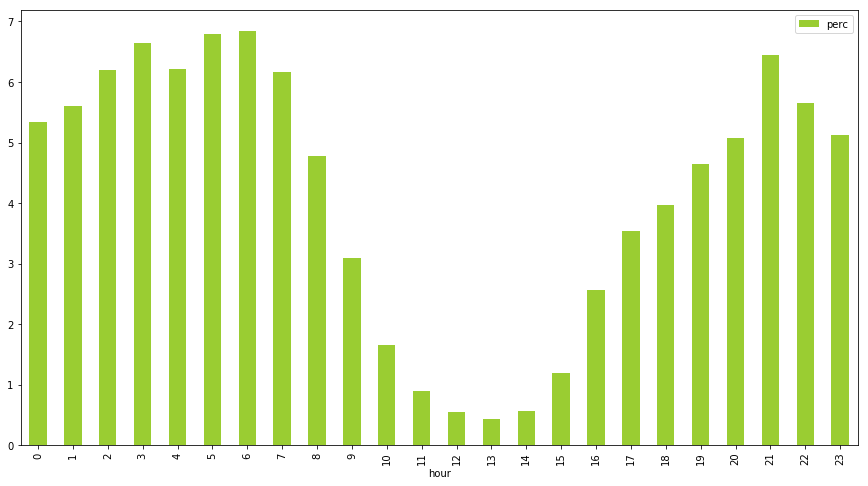

In [46]:
from matplotlib import pyplot as plt
ax = plt.gca()
unaccepted_hour_count_df.plot(kind='bar',x='hour',y='perc',color='yellowgreen',ax=ax)
plt.rcParams["figure.figsize"] = (15,8)
plt.show()

In [47]:
accepted_hour_count_df = accepted_hour_df.groupby('hour').size().reset_index(name='count')
accepted_hour_count_df

,hour,count
0,0,315
1,1,340
2,2,381
3,3,461
4,4,390
5,5,453
6,6,446
7,7,436
8,8,310
9,9,192


In [48]:
accepted_hour_count_df['perc']= round(accepted_hour_count_df['count']/accepted_hour_count_df['count'].sum() * 100,4)
accepted_hour_count_df.head()

,hour,count,perc
0,0,315,4.8777
1,1,340,5.2648
2,2,381,5.8997
3,3,461,7.1384
4,4,390,6.0390


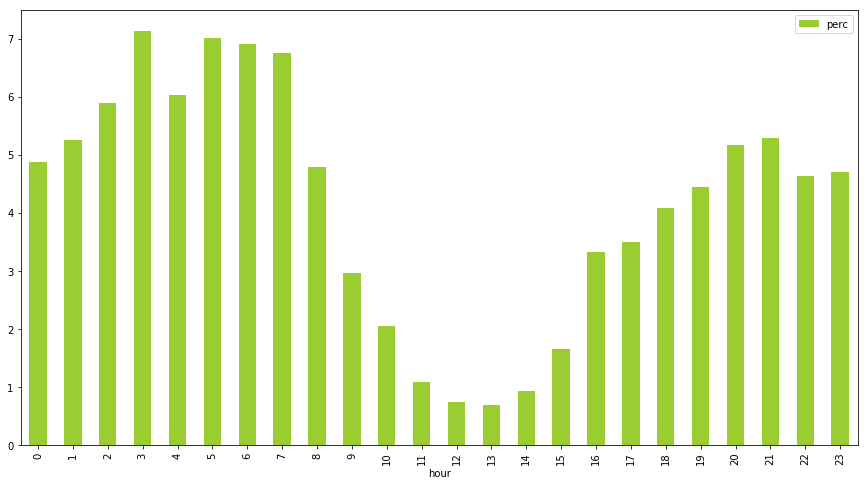

In [49]:
from matplotlib import pyplot as plt
ax = plt.gca()
accepted_hour_count_df.plot(kind='bar',x='hour',y='perc',color='yellowgreen',ax=ax)
plt.rcParams["figure.figsize"] = (15,8)
plt.show()

In [51]:
unaccepted_model_input_path =  "{}/{}".format(unaccepted_base_path,'3_HistogramModelTypes/part-00000-4d54dff9-636a-4c26-9d9e-96a17e0a4af2-c000.csv')
unaccepted_model_df = pd.read_csv(unaccepted_model_input_path)
unaccepted_model_df.head()


,model,os_version
0,SO-01L,9
1,SO-01L,9
2,SH-03K,9
3,SO-04K,9
4,SO-03K,9


In [203]:
model_count_df = model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
model_count_df.head(100)

,model,count
0,SO-01L,1373271
1,SH-03K,1086186
2,SO-01K,638738
3,SH-01L,630671
4,SC-01L,394380
5,SC-02L,327575
6,SO-02K,250218
7,SO-03K,247188
8,SO-05K,166719
9,SO-04K,119914


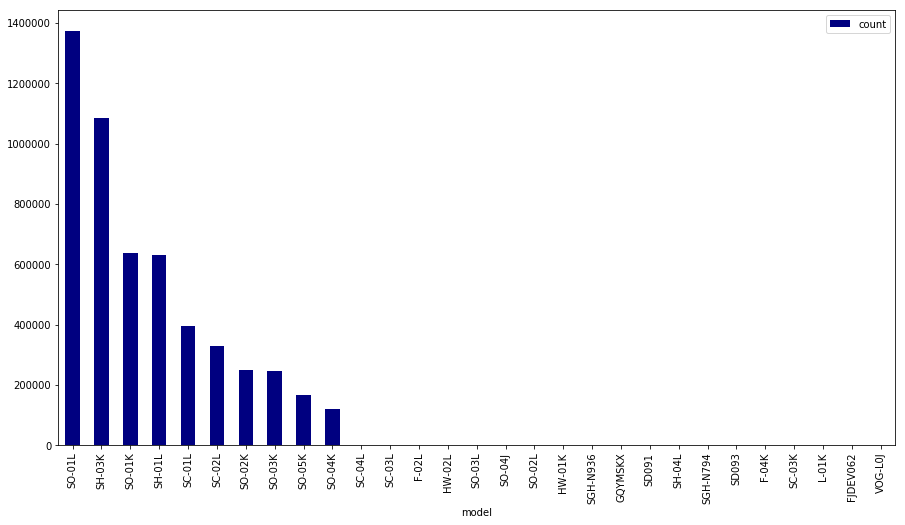

In [204]:
ax = plt.gca()
model_count_df[['model','count']].plot(kind='bar',x='model',y='count',color='navy',ax=ax)
plt.rcParams["figure.figsize"] = (15,8)
plt.show()

In [144]:
hour_count_df['count'].sum()

5235607

In [146]:
input_full_path = "{}/{}".format(base_path,'/singleOutput/part-00000-4e04564b-61ca-4fb6-8d69-11df3072f630-c000.csv')
hour_df = pd.read_csv(input_full_path)
hour_df.head(100)

,_id,model,os_version,helpID,eventTime,eventRoot,eventType,eventDetail,result
0,05O55G5455QNL4JTP4J055PQ,SO-01L,9,1799000010,2019-02-02T21:56:32.000+09:00,0,1,1,NaN
1,05O55G5455QNL4JTP4J055PQ,SO-01L,9,1799000010,2019-02-13T21:22:28.000+09:00,0,3,1,[0_2_3]
2,05O55G5455QNL4JTP4J055PQ,SO-01L,9,1799000010,2019-02-15T01:01:17.000+09:00,0,1,1,NaN
3,05O55G5455QNN40TP4L055PG,SO-03K,9,1799000010,2019-03-06T03:34:53.000+09:00,0,1,1,NaN
4,05O55G5455QNN4NTP4Q055P0,SH-01L,8.1.0,1799000010,2019-03-11T23:49:45.000+09:00,0,1,1,NaN
5,05O55G5455QNO4OTP4T055PQ,SO-01L,9,1799000010,2019-03-03T05:20:19.000+09:00,0,3,1,[3_2_0]
6,05O55G5455QNO4OTP4T055PQ,SO-01L,9,1799000010,2019-03-27T06:57:22.000+09:00,0,1,1,NaN
7,05O55G5455QNQ4NTP40055PQ,SH-01L,8.1.0,1799000010,2019-02-05T15:11:13.000+09:00,0,1,1,NaN
8,05O55G5455QNQ4NTP40055PQ,SH-01L,8.1.0,1799000010,2019-03-04T17:15:25.000+09:00,0,3,2,NaN
9,05O55G5455QNQ4NTP40055PQ,SH-01L,8.1.0,1799000010,2019-03-23T06:48:24.000+09:00,0,2,A_12,[0.89_0.015_0.02_0.059_0.007_0.006]
